In [22]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load the dataset  
df_flights = pd.read_csv('flights.csv')  
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [23]:
# Check for missing values  
missing_values = df_flights.isnull().sum()  
print(missing_values[missing_values > 0])

DepDel15    2761
dtype: int64


In [24]:
# Impute missing values for DepDelay and ArrDelay with the median  
df_flights['DepDelay'] = df_flights['DepDelay'].fillna(df_flights['DepDelay'].median())  
df_flights['ArrDelay'] = df_flights['ArrDelay'].fillna(df_flights['ArrDelay'].median())

In [25]:
# Calculate IQR for DepDelay and ArrDelay  
Q1 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.25)  
Q3 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.75)  
IQR = Q3 - Q1  

# Filter out outliers  
df_flights = df_flights[~((df_flights[['DepDelay', 'ArrDelay']] < (Q1 - 1.5 * IQR)) | (df_flights[['DepDelay', 'ArrDelay']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [26]:
# View summary statistics  
summary_stats = df_flights.describe()  
print(summary_stats)

           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  235067.0  235067.000000  235067.000000  235067.000000    235067.000000   
mean     2013.0       7.017969      15.801303       3.903555     12755.279520   
std         0.0       2.003171       8.849921       1.996283      1507.709532   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  235067.000000  235067.000000  235067.000000  232306.000000   
mean    12736.502418    1293.518831       0.373447       0.082460   
std      1504.564524     470.134495       8.029744       0.2750

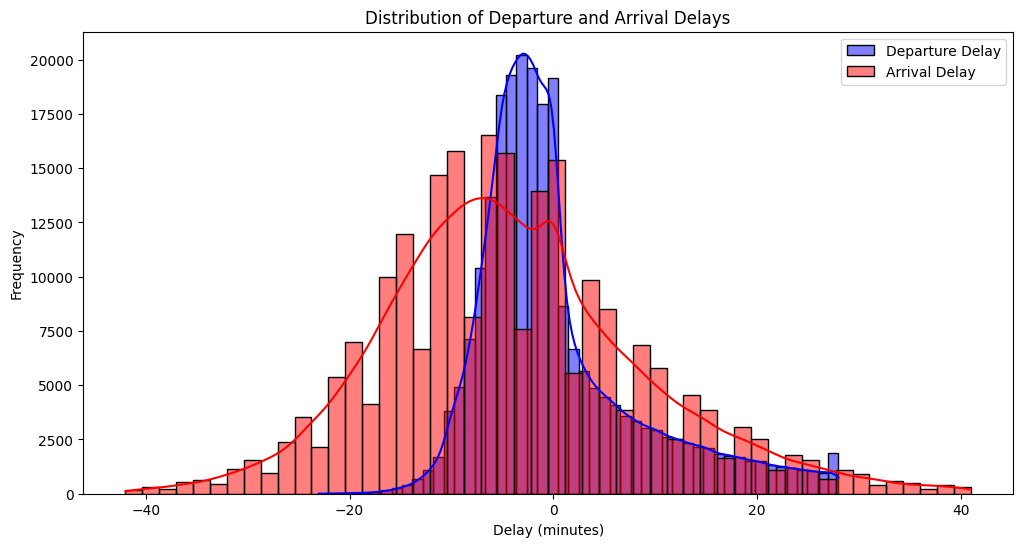

In [27]:
# Plot distributions  
plt.figure(figsize=(12, 6))  
sns.histplot(df_flights['DepDelay'], bins=50, kde=True, color='blue', label='Departure Delay')  
sns.histplot(df_flights['ArrDelay'], bins=50, kde=True, color='red', label='Arrival Delay')  
plt.legend()  
plt.title('Distribution of Departure and Arrival Delays')  
plt.xlabel('Delay (minutes)')  
plt.ylabel('Frequency')  
plt.show()

In [28]:
# Calculate average delays  
average_dep_delay = df_flights['DepDelay'].mean()  
average_arr_delay = df_flights['ArrDelay'].mean()  
print(f'Average Departure Delay: {average_dep_delay} minutes')  
print(f'Average Arrival Delay: {average_arr_delay} minutes')

Average Departure Delay: 0.3734467194459452 minutes
Average Arrival Delay: -4.029842555526722 minutes


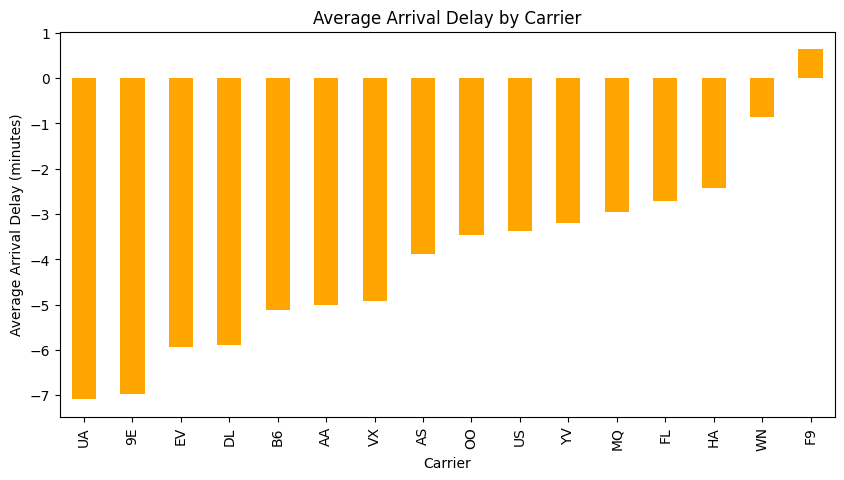

In [29]:
# Compare carriers  
carrier_performance = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values()  
carrier_performance.plot(kind='bar', figsize=(10, 5), color='orange')  
plt.title('Average Arrival Delay by Carrier')  
plt.ylabel('Average Arrival Delay (minutes)')  
plt.show()

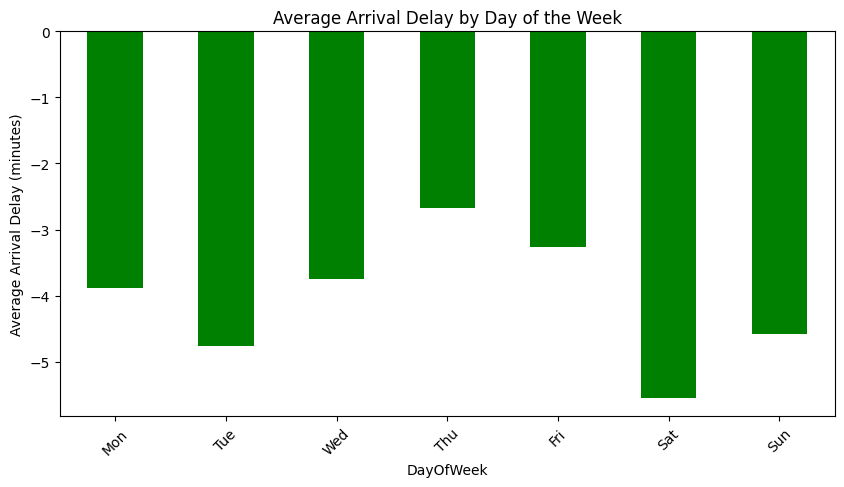

In [30]:
# Average arrival delays by day of the week  
day_delay = df_flights.groupby('DayOfWeek')['ArrDelay'].mean()  
day_delay.plot(kind='bar', figsize=(10, 5), color='green')  
plt.title('Average Arrival Delay by Day of the Week')  
plt.ylabel('Average Arrival Delay (minutes)')  
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)  
plt.show()

In [10]:
# Departure airport with highest average delay  
airport_delay = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)  
print(airport_delay.head(1))

OriginAirportName
Chicago Midway International    4.995548
Name: DepDelay, dtype: float64


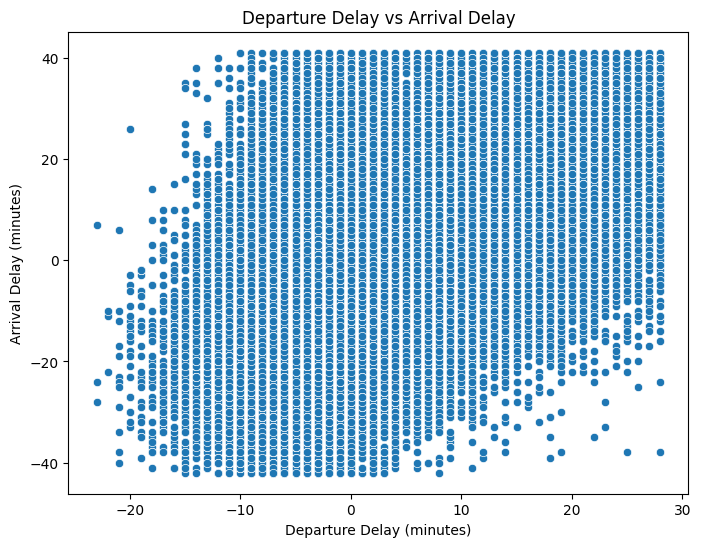

In [11]:
# Correlation between departure and arrival delays  
plt.figure(figsize=(8, 6))  
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df_flights)  
plt.title('Departure Delay vs Arrival Delay')  
plt.xlabel('Departure Delay (minutes)')  
plt.ylabel('Arrival Delay (minutes)')  
plt.show()

In [12]:
# Routes with most late arrivals  
late_arrivals = df_flights[df_flights['ArrDelay'] > 15]  
route_late_arrivals = late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().sort_values(ascending=False)  
print(route_late_arrivals.head(10))

OriginAirportName                                     DestAirportName                         
Los Angeles International                             San Francisco International                 77
San Francisco International                           Los Angeles International                   73
LaGuardia                                             Hartsfield-Jackson Atlanta International    66
Los Angeles International                             John F. Kennedy International               61
McCarran International                                Los Angeles International                   60
Los Angeles International                             McCarran International                      53
McCarran International                                San Francisco International                 47
Orlando International                                 Hartsfield-Jackson Atlanta International    46
John F. Kennedy International                         Los Angeles International                  

In [14]:
# Route with highest average arrival delay  
route_avg_delay = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)  
print(route_avg_delay.head(1))

OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Name: ArrDelay, dtype: float64
